# Chapter 4. Detecting Patterns with Unsupervised Learning

## 2017. 10. 19. YeongGeun Na

1. What is **unsupervised learning**?
2. Clustering data with **K-Means algorithm**
3. Estimating the number of clusters with **Mean Shift algorithm**
4. Estimating the quality of clustering with **silhouette scores**
5. What are **Gaussian Mixture Models**?
6. Building a classifier based on **Gaussian Mixture Models**
7. Finding subgroups in stock market using **Affinity Propagation model**
8. Segmenting the market based on shopping patterns

# What is unsupervised learning?

Unsupervised learning은 label된 training data를 이용하지 않고 Maching learning model을 구축하는 과정을 의미합니다.

- *market Segmentation, stock market, NLP, computer vision 등* 다양한 분야에서 사용됨
- 실세계에서는, 데이터가 항상 label되어 있지 않고, 이 데이터를 어떤 방식으로든 분류만 해야하는 경우들이 있습니다. 

Unsupervised Learning algorithm은 몇몇 similarity metric을 사용하여 주어진 dataset 안에서 subgroup을 찾을 수 있는 모델을 구축합니다.

이 chapter에서는 unsupervised learning에서 이런 문제들을 어떻게 공식으로 풀어나가는지 설명합니다.

- label이 없는 dataset을 가지고 있을 때, 우리는 이 데이터가 latent variable(잠재변수)들이 영향을 미쳐 생성되었다고 가정합니다.
- learning 과정은 개별 데이터 지점에서부터 시작하여 계층적 방법으로 진행될 수 있습니다.
- 이를 통해, 우리는 데이터로 더 깊은 레벨의 표현 끌어낼 수 있습니다.

## Clustering data with K-Means algorithm

Clusterring은 data들을 분석하여 그 안에 있는 cluster를 찾는 기술이다.

- 데이터를 서로 비슷한 element들로 이루어진 subgroup으로 분류하는 과정이라고 할 수 있습니다.
- unsupervised learning 기술 중 가장 많이 사용된다.

cluster들을 찾기 위해, *Euclidean distance*와 같은 similarity measure가 사용된다.

- 이런 similarity measure를 사용하여 cluster의 tightness를 평가할 수 있다.

우리의 목표는 data point들을 같은 subgroup으로 속하게 만드는 intrinsic property를 식별하는 것입니다.

- 모든 case에 동작하는 보편적 similarity metric은 없습니다.
- 동작하는 similarity metric은 현재의 문제에 따라 다릅니다.
  - 예를 들어, 대표 data point를 찾는 문제와, data들 속에서 이상한 값을 찾는 것은 다른 metric을 사용해야 할 것입니다.
- 즉 상황에 맞는 적절한 metric을 선택해야 합니다.

K-Means 알고리즘은 data를 clustering를 할 때 자주 사용됩니다.

- 이 알고리즘을 사용하기 위해서는 cluster의 개수를 미리 알고 있어야 합니다.
- 다양한 data attribute를 사용하여, data를 K개의 subgroup에 분류합니다.
- 각 반복마다 우리는 K centroid의 위치를 업데이트 합니다.
  - K centroid는 subgroup의 중심 위치입니다.
  - 이것이 핵심 아이디어 입니다.
- 이 과정을 centroid가 optimal한 위치에 갈 때까지 반복합니다.

![https://image.slidesharecdn.com/k-mean-clustering-150729122635-lva1-app6892/95/k-meanclustering-algorithm-9-638.jpg?cb=1438172869](https://image.slidesharecdn.com/k-mean-clustering-150729122635-lva1-app6892/95/k-meanclustering-algorithm-9-638.jpg?cb=1438172869)

위에서 알 수 있듯 centroid의 초기 위치는 이 알고리즘에서 중요합니다.

- 이 초기 위치는 결과에 영향을 미치기에, 똑똑한 방법을 거쳐 정해야 합니다.
- 좋은 전략으로, centroid를 서로 최대한 멀리 위치시키는 방법이 있습니다.
- 하지만 outlier가 선택되는 경우가 있을 수 있습니다.

![http://cfile5.uf.tistory.com/image/1456BF0C49F324A5E8974A](http://cfile5.uf.tistory.com/image/1456BF0C49F324A5E8974A)


![http://cfile25.uf.tistory.com/image/197BDD0B49F32746CEDBE2](http://cfile25.uf.tistory.com/image/197BDD0B49F32746CEDBE2)

기본적인 K-Means 알고리즘은 K-Means++를 이용해 초기 위치를 도출합니다.


1. 1 번째 center는 랜덤으로 정한다.
2. for i = 2 ~ k
  - 모든 인스턴스 x마다 아래의 확률을 부여한다.
    - p(x) = D(x)2/Σx'D(x')2     [x'는 인스턴스집합 X의 원소들]
    - 여기서 D(x)는 x에서 지금까지의 center중 제일 가까운 center와의 거리를 뜻한다.
  - 그러면, 모든 인스턴스에 확률이 부여된 이 상태에서 i 번째 center를 'random으로 찍는다'.
    - 높은 확률이 부여되어 있다는 것은 i번째 center로 선정될 가능성이 높다는 뜻이다.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [26]:
# 입력 데이터를 가져온다.
X = np.loadtxt('data_clustering.txt', delimiter=',')

In [27]:
# K-means 알고리즘을 적용하기 전에 먼저 cluster의 개수를 정한다.
num_clusters = 5

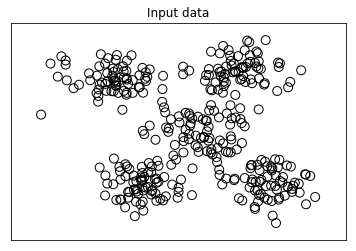

In [28]:
# 입력 데이터의 분포를 쉽게 볼 수 있도록 그래프로 표현한다
# 이 코드는 그래프를 그리기 위한 코드
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=80)
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
# KMeans Object 생성
# init: 초기 위치를 효과적으로 지정하기 위해 k-means++ 사용
# n_clusters: cluster 개수
# n_init: optimal한 결과를 도출할 때까지 반복할 횟수
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [9]:
# Kmeans clustering model training
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
# 그래프를 grid로 나누고 그 교차점들을 test data로 삼아서 model을 평가한다
# 먼저, grid의 간격을 지정한다.
step_size = 0.01

In [12]:
# grid를 정의한다, input data를 모두 포함할 수 있도록 구성
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

In [21]:
# training된 k-means model에 grid의 모든 점을 넣어 속할 cluster를 예측
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

In [22]:
# 출력 값을 그래프로 그리고, 각 영역을 컬러로 표시한다.
print(output.shape)
output = output.reshape(x_vals.shape)
print(output.shape)


(1390883,)
(1261, 1103)


In [30]:
plt.figure()
plt.clf()

plt.imshow(output, interpolation='nearest',
          extent=(x_vals.min(), x_vals.max(),
                 y_vals.min(), y_vals.max()),
          cmap=plt.cm.Paired,
          aspect='auto',
          origin='lower')

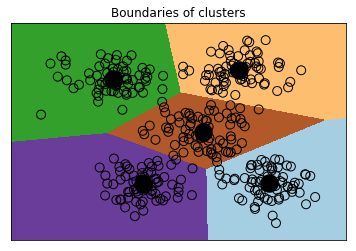

In [31]:
# input point(data) 덧그리기
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=80)
# Cluster centroid 그리기
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
           marker='o', s=210, linewidths=4, color='black',
           zorder=12, facecolors='black')
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Estimating the number of clusters with Mean Shift algorithm

Mean Shift 알고리즘은 unsupervised algorithm 중 성능이 뛰어나기로 유명하다.

- data가 standard probability distribution(표준 확률 분포)를 따른다는 가정을 하지 않는다.
- K-means는 그런 가정을 하고 있다.
- 또한 cluster의 개수를 몰라도 된다.
- 학습에 요구되는 계산량이 많다는 단점이 있다.
- 물체 추적, 실시간 데이터 분석 같은 분야에서 주로 사용됨

Mean Shift 알고리즘은 전체 feature space를 probability density funtion(확률 밀도 함수)로 표현한다.

- 이 절의 예제에서 사용되는 training data set도 그에 따라 샘플링되었다고 가정한다.
- 여기서 찾는 cluster들은 데이터 분포에 대한 local maxima(국소적 최대값)에 해당
- 즉 데이터 분포에서 peak는 cluster의 수 K만큼 존재한다.

Mean Shift 알고리즘의 목적은 centroid의 위치를 찾는 것이다.

- training set에 있는 모든 개별 data마다 window를 정의한다.
- 그리고 새로운 centroid을 계산해서 갱신한다
  - window 내의 가장 밀도가 높은 곳으로 이동한다.
  - centroid들이 더 이상 이동하지 않을 때까지 반복한다.
- 이 과정에서 개별 data들은 자신이 속한 cluster들을 향해 나아가게 된다

![http://img1.daumcdn.net/thumb/R1920x0/?fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F1606F43C4EF8F8532B803B](http://img1.daumcdn.net/thumb/R1920x0/?fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F1606F43C4EF8F8532B803B)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [33]:
# input file에서 data 가져오기
X = np.loadtxt('data_clustering.txt', delimiter=',')

In [34]:
# X에 대한 bandwidth 계산하기
# bandwidth란 Mean Shift 알고리즘에서 사용하는 내부 커널의 density estimation process에서 쓰이는 매개변수
# 쉽게 말해 window의 크기라고 보면 된다.
# bandwidth가 커지만, cluster의 수가 줄어들고
# 반대의 경우 cluster가 너무 많아질 수 있다.

# quantile이 클수록 bandwidth가 늘어난다.
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [36]:
# Mean Sift 알고리즘을 이용해 data clustering
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [37]:
# cluster center 구하기
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)


Centers of clusters:
 [[ 2.95568966  1.95775862]
 [ 7.17563636  2.18145455]
 [ 2.17603774  8.03283019]
 [ 5.97960784  8.39078431]
 [ 4.81044444  5.07111111]]


In [40]:
# cluster의 개수 구하기
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of clusters in input data =', num_clusters)


Number of clusters in input data = 5


In [48]:
# data point와 cluster center를 그래프로 그리기
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # 현재 cluster에 속한 포인트 그리기
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')
    # cluster의 center를 그리기
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o', 
            markerfacecolor='black', markeredgecolor='black',
            markersize=15)

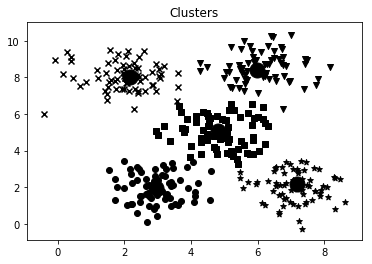

In [49]:
plt.title('Clusters')
plt.show()

## Estimating the quality of clustering with silhouette scores

data를 cluster로 구분하는 일이 쉽게 된다면 다행이지만 그런 경우는 드물다.

- 현실의 데이터는 방대하고 지저분하다.
- 그래서 cluster의 품질을 측정하는 수단이 필요하다.

silhouette score는 data에 존재하는 cluster의 consistency를 검사하는 방법이다.

- 특정한 data가 다른 cluster에 비해 자신이 속한 cluster에 얼마나 가까운지를 측정하는 지표

주어진 data에 대해 silhouette score를 계산하는 방법은 아래와 같다.

```
silhouette score = (p - q) / max(p, q)
```

- p는 data가 속하지 않은 cluster 중에서 가장 가까운 cluster에 있는 data와의 거리에 대한 평균
- q는 자신이 속한 cluster에 있는 모든 점과 data와의 거리에 대한 평균

![https://lh4.googleusercontent.com/-ku6hE_438mo/TXA0yYUWLTI/AAAAAAAAACs/UqtvwlXLkc0/s1600/picture2.gif](https://lh4.googleusercontent.com/-ku6hE_438mo/TXA0yYUWLTI/AAAAAAAAACs/UqtvwlXLkc0/s1600/picture2.gif)

silhouette score는 -1과 1 사이의 값을 가지며

- 1에 가까울 수록 현재 data가 자신이 속한 cluster의 다른 data와 유사
- -1에 가까울수록 현재 data가 자신이 속한 cluster와 다르다는 것을 의미

silhouette score가 음수인 data가 너무 많다면 cluster의 수가 너무 적거나 많다고 판단할 수 있다.

- 이 경우 parameter를 수정해서 cluster의 수를 최적화 하는 것이 좋음


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [51]:
# input file에서 데이터 가져오기
X = np.loadtxt('data_quality.txt', delimiter=',')

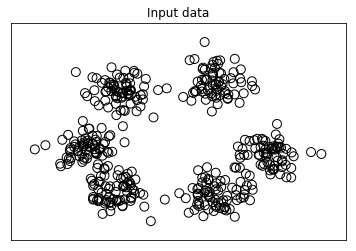

In [52]:
# 입력 데이터 그래프 그리기
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=80)
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [55]:
# variable을 초기화
# values는 cluster 수를 담고 있을 예정(2개, 3개,...)
scores = []
values = np.arange(2, 10)
print(values)

[2 3 4 5 6 7 8 9]


In [56]:
# values에 있는 모든 값에 대해 loop를 돌면서 K-Means Model을 만든다.

# 앞에서 정의한 영역에 대해 loop 돌기
# 뒤로 갈수록 cluster 개수가 증가
for num_clusters in values:
    # KMeans cluster training
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    
    # 현재 cluster model에 대한 silhouette score 계산
    score = metrics.silhouette_score(X, kmeans.labels_,
                                    metric='euclidean', sample_size=len(X))
    
    # silhouette score 출력
    print('\nNumber of clusters =', num_clusters)
    print('Silhouette score =', score)
    scores.append(score)
    


Number of clusters = 2
Silhouette score = 0.477626248705

Number of clusters = 3
Silhouette score = 0.547174241173

Number of clusters = 4
Silhouette score = 0.579480188969

Number of clusters = 5
Silhouette score = 0.589003263565

Number of clusters = 6
Silhouette score = 0.609690411895

Number of clusters = 7
Silhouette score = 0.553150613471

Number of clusters = 8
Silhouette score = 0.492635226538

Number of clusters = 9
Silhouette score = 0.469145847204



Optimal number of clusters = 6


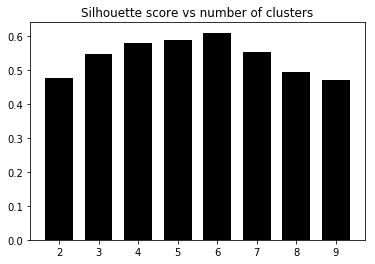

In [57]:
# silhouette score 그래프 그리기
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# 가장 높은 silhouette score를 찾아서 최적의 # of cluster 구하기
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

## What are Gaussian Mixture Models?

Gaussian Mixture Model은 여러개의 Gaussian distribution 를 따른다고 가정하는 probability density model이다.

- multi-modal density funtion(봉우리가 여러개인)를 만들기 위해 여러 component distribution을 섞기 때문에 Mixture Model이라 한다.

![https://ds055uzetaobb.cloudfront.net/image_optimizer/d47c612ae8c3dc7f5aef1fc66458456f4eea4145.png](https://ds055uzetaobb.cloudfront.net/image_optimizer/d47c612ae8c3dc7f5aef1fc66458456f4eea4145.png)

Mixture Model의 예로 남미 사람들의 쇼핑 성향에 대한 Model을 들 수 있다.

1. 남미 대륙 전체의 모델
2. 각 나라의 쇼핑 성향 모델
3. 전세계 모델

이렇게 섞어서 하면 좀 더 정확한 Model을 도출할 수 있다

GMM은 semi-parametric 기법이다. 

- 즉 사전에 정의한 함수의 형태에 어느 정도 영향을 받는다.
- data의 distribution를 정확하고 유연하게 모델링 할 수 있다.


각 Gaussian Model Component에 weight를 주는 식으로 function을 정의하면 GMM은 parametric해진다.

- parameter(weight)는 학습 데이터에 대해 Expectation-Maximization이나 Maximum A-Posteriori 같은 알고리즘을 적용해 추정한다.

GMM은 이미지 데이터베이스 검색, 주식 시장 변동 모델링, 생체 인증 등에서 활용된다.


## Building a classifier based on Gaussian Mixture Models

![https://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png](https://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png)

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from sklearn import datasets
from sklearn.mixture import GMM
from sklearn.cross_validation import StratifiedKFold

In [147]:
# classification data는 iris(붓꽃) dataset이다.
iris = datasets.load_iris()

In [148]:
# dataset을 80(train):20(test) 으로 나눈다.
# n_folds: n개의 영역으로 나눈다.
indices = StratifiedKFold(iris.target, n_folds=5)

In [149]:
# 첫 번째 영역 추출
train_index, test_index = next(iter(indices))

# training data와 label 추출
X_train = iris.data[train_index]
y_train = iris.target[train_index]

# testing data와 label 추출
X_test = iris.data[test_index]
y_test = iris.target[test_index]

In [150]:
# training data에서 class의 개수 추출(iris 종류 개수)
num_classes = len(np.unique(y_train))

In [151]:
# 이제 GMM 기반으로 분류기를 만든다.
# n_components: underlying distribution에 있는 component(gaussian model) 의 개수
# covariance_type: covariance의 종류, 여기서는 full covariance를 사용한다.
# init_params: training 과정에서 업데이트할 parameter 지정, 예제에서는 wc(weight, covariance)가 업데이트됨
# n_iter: training 과정에서 EM(Expectation-Maximization) 알고리즘 반복 횟수
classifier = GMM(n_components=num_classes, covariance_type='full',
                init_params='wc', n_iter=20)


/Users/amazingguni/.pyenv/versions/3.6.1/envs/notebook/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [152]:
# GMM 평균 초기화
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0)
                             for i in range(num_classes)])

In [153]:
# GMM classifier training
classifier.fit(X_train)

/Users/amazingguni/.pyenv/versions/3.6.1/envs/notebook/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/amazingguni/.pyenv/versions/3.6.1/envs/notebook/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/amazingguni/.pyenv/versions/3.6.1/envs/notebook/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  w

GMM(covariance_type='full', init_params='wc', min_covar=0.001, n_components=3,
  n_init=1, n_iter=20, params='wmc', random_state=None, tol=0.001,
  verbose=0)

In [154]:
# classifier의 boundary를 그래프로 그린다.
# cluster 주위에 타원형 boundary를 그릴 때 적용할 고유값과 고유 백터를 구한다.
plt.figure()
colors = 'bgr'
for i, color in enumerate(colors):
    # 고유값과 고유 백터 구하기, get_covars()는 각각의 분류별로 data를 제공해주는 것으로 보임(추가 확인 필요)
    # 그 중 앞 2개만 선정해서 그래프에 활용하는 것 같네요 ㅎㅎ
    eigenvalues, eigenvectors = np.linalg.eigh(classifier._get_covars()[i][:2, :2])
    
    # 첫 번째 고유 백터를 정규화
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
    
    # 분포를 정확하게 표현하기 위해 angle 계산
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi
    
    # 타원의 scale 지정
    # 여기선 적당한 값으로 지정
    scaling_factor = 9
    eigenvalues *= scaling_factor
    
    # 타원 그리기
    ellipse = patches.Ellipse(classifier.means_[i, :2],
                             eigenvalues[0], eigenvalues[1], 180 + angle,
                             color=color)
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

/Users/amazingguni/.pyenv/versions/3.6.1/envs/notebook/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [155]:
# input data 그래프 그리기
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:, 0], cur_data[:, 1], marker='o',
               facecolors='none', edgecolors='black', s=40,
               label=iris.target_names[i])

    # test data 그리기
    test_data = X_test[y_test == i]
    plt.scatter(test_data[:, 0], test_data[:, 1], marker='s',
           facecolors='black', edgecolors='black', s=40,
           label=iris.target_names[i])

Accuracy on training data = 87.5
Accuracy on testing data = 86.6666666667


/Users/amazingguni/.pyenv/versions/3.6.1/envs/notebook/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/amazingguni/.pyenv/versions/3.6.1/envs/notebook/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


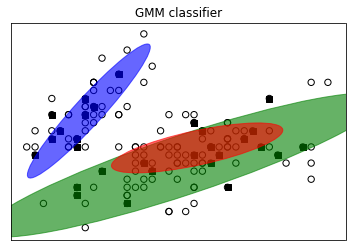

In [156]:
# training/test data에 대한 예측 결과 계산
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training)

y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Accuracy on testing data =', accuracy_testing)

plt.title('GMM classifier')
plt.xticks(())
plt.yticks(())

plt.show()

## Finding subgroups in stock market using Affinity Propagation model

Affinity Propagation(유사도 전파) clustering 알고리즘은 message passing 기법을 이용해 cluster의 exemplar(대표점)을 찾는다.

- cluster의 개수를 미리 지정하지 않아도 되며, 단순하고 범용적으로 사용할 수 있도록 설계

1. 분석할 대상에 대한 similarity 측정 기준을 지정
2. exemplar를 찾을 때까지 data끼리 message를 주고 받음
  - responsibility
    - cluster의 구성원이 exemplar candidate에게 전달하는 메시지
    - 각 data가 이 exemplar이 속한 cluster에 얼마나 적합한지를 표현
  - availability
    - exemplar candidate가 cluster의 구성원에게 자신이 얼마나 적합한지를 표현한다.
3. AP 알고리즘은 최적의 exemplar set으로 수렴할 때까지 이 과정을 반복 

exemplar의 수는 preference라는 parameter로 제어한다.

- 이 수가 많으면 너무 많은 수의 cluster를 찾음
- 반대의 경우 너무 적은 수의 cluster
- 보통 data간 similarity metric의 중간값으로 지정

![https://www.researchgate.net/profile/Ferran_Torrent_Fontbona/publication/265969600/figure/fig8/AS:295818004320262@1447539916523/Figure-28-Illustration-of-how-affinity-propagation-works-Taken-from-42.png](https://www.researchgate.net/profile/Ferran_Torrent_Fontbona/publication/265969600/figure/fig8/AS:295818004320262@1447539916523/Figure-28-Illustration-of-how-affinity-propagation-works-Taken-from-42.png)

In [187]:
import datetime
import json

import numpy as np
import matplotlib.pyplot as plt
from sklearn import covariance, cluster
from matplotlib.finance import quotes_historical_yahoo_ochl as quotes_yahoo


In [188]:
# 주식 시세 데이터는 matplotlib에서 제공하는 것을 사용한다.
# 기업 코드와 전체 이름에 대한 매핑 정보는 json파일에 있는 것을 사용한다.
input_file = 'company_symbol_mapping.json'

In [189]:
# 기업 코드 맵 가져오기
with open(input_file, 'r') as f:
    company_symbols_map = json.loads(f.read())
symbols, names = np.array(list(company_symbols_map.items())).T

In [199]:
# 주식 시세 기록 가져오기
start_date = datetime.datetime(2003, 7, 3)
end_date = datetime.datetime(2007, 5, 4)
quotes = [quotes_yahoo(symbol, start_date, end_date, asobject=True) for symbol in symbols]

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [ ]:
# 개장 시점 가격과 폐장 시점 가격 가져오기
opening_quotes = np.array([quote.open for quote in quotes]).astype(np.float)
closing_quotes = np.array([quote.close for quote in quotes]).astype(np.folat)

In [ ]:
# 개장 시점의 가격과 폐장 시점의 가격 차이 계산하기
quotes_diff = closing_quotes - opening_quotes

In [ ]:
# 데이터를 정규화
X = quotes_diff.copy().T
X /= X.std(axis=0)

In [169]:
# 그래프 모델 생성
edge_model = covariance.GraphLassoCV()

In [170]:
# 모델 training
with np.errstate(invalid='ignore'):
    edge_model.fit(X)
    

In [171]:
# AP 모델로 cluster model 구축
_, labels = cluster.affinity_propagation(edge_model.covariance_)
num_labels = labels.max()

In [172]:
# clustering 결과 출력
print('\nClustering of stocks based on difference in opening and closing quotes:\n')
for i in range(num_labels + 1):
    print("Cluster", i+1, "==>", ', '.join(names[labels == i]))


Clustering of stocks based on difference in opening and closing quotes:



IndexError: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 2

## 쇼핑 패턴에 따른 시장 세분화

이번에는 unsupervised learning을 이용해 고객의 쇼핑 성향에 따라 시장을 세분화(market segmentation)하는 예제를 만들어본다.

data는 sales.csv에서 가져온다

- 이 파일은 여러 소매 의류 상점으로부터 수집한 다양한 인기 상품에 대한 상세한 판매 정보를 가지고 있다.
- 이 예제에서는 이런 판매량 정보에서 패턴을 찾아 market segmentation을 하는 것이다.

In [173]:
import csv

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

In [174]:
# input 파일에서 data를 가져온다.
# csv 파일 포멧이기 때문에 읽은 이후에 numpy 배열로 변환한다.
input_file = 'sales.csv'
file_reader = csv.reader(open(input_file, 'r'), delimiter=',')

X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[1:]
        continue
    X.append([float(x) for x in row[1:]])

# numpy array로 변환
X = np.array(X)

In [175]:
# input data bandwidth 추정하기
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))

In [176]:
# MeanShift로 clustering 계산하기
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=26006.389359024277, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [177]:
# 각 cluster의 label과 center를 추출
labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

In [184]:
# cluster의 수와 center를 화면에 출력
print('\nNumber of clusters in input data =', num_clusters)

print('\nCenters of clusters:')
print('\t'.join([name[:3] for name in names]))
for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))


Number of clusters in input data = 9

Centers of clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
28333	34263	24065	5575	4229	18076
14987	46397	97393	1127	37315	3235
22617	77873	32543	1005	21035	837
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
7852	4939	63081	134	40066	1332


In [185]:
# 6차원을 시각화하기 곤란하므로 2차원만 뽑아낸다
cluster_centers_2d = cluster_centers[:, 1:3]

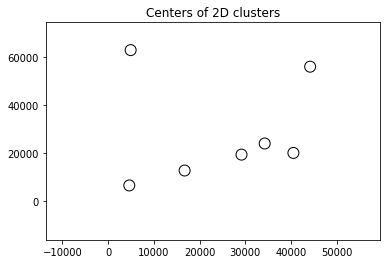

In [186]:
# cluster center 그래프 그리기
plt.figure()
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1],
           s=120, edgecolors='black', facecolors='none')

offset = 0.25
plt.xlim(
    cluster_centers_2d[:, 0].min() - offset * cluster_centers_2d[:, 0].ptp(),
    cluster_centers_2d[:, 0].max() - offset * cluster_centers_2d[:, 0].ptp())
plt.ylim(
    cluster_centers_2d[:, 1].min() - offset * cluster_centers_2d[:, 1].ptp(),
    cluster_centers_2d[:, 1].max() - offset * cluster_centers_2d[:, 1].ptp())

plt.title('Centers of 2D clusters')
plt.show()